In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
folder = "/Users/julius/Library/CloudStorage/GoogleDrive-juliusjacobitz@gmail.com/My Drive/Studium/Master/07_Semester_Leuven/Genetic Algorithms/CodeGroupPhase/src/data/output_julius/"

In [28]:
tour= "50"
filepath = f"{tour}/tour_50_seed69_1761650828.csv"

## Read Data

In [29]:

df = pd.read_csv(folder+filepath,skiprows=2,header=None)
df = df.drop(columns=[54])
cols_to_merge = df.columns[4:54]  # Python slices are exclusive on the end

# Merge cycle columns into a single list column
df["Cycle"] = df[cols_to_merge].apply(
    lambda row: [x for x in row if pd.notna(x) and np.issubdtype(type(x), np.number)],
    axis=1
)
df = df.drop(columns=cols_to_merge)
df.columns = ["# Iteration", "Elapsed time", "Mean value", "Best value", "Cycle"]

## Plot against time

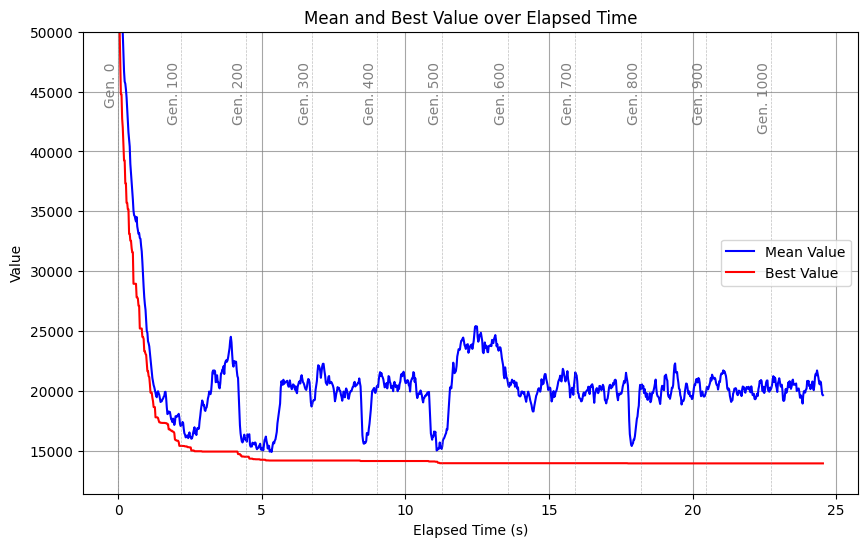

In [30]:
# plot data x axis elapsed time, y axis mean value
# also add a line for each 100. generation and label it with the generation number
y_lim_max = 50000
y_lim_min = None


plt.figure(figsize=(10, 6))
plt.plot(df["Elapsed time"], df["Mean value"], label="Mean Value", color='blue')
plt.plot(df["Elapsed time"], df["Best value"], label="Best Value", color='red')
for i in range(0, len(df), 100):
    plt.axvline(x=df["Elapsed time"][i], color='gray', linestyle='--',linewidth=0.5, alpha=0.5)
    plt.text(df["Elapsed time"][i], y_lim_max*0.95, "Gen. "+str(df["# Iteration"][i]), rotation=90, verticalalignment='top', horizontalalignment='right', color='gray')
plt.ylim(y_lim_min, y_lim_max)
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Value")
plt.title("Mean and Best Value over Elapsed Time")
plt.legend()
# dark grid
plt.grid(visible=True, which='both', color='gray', alpha=0.7)
plt.show()

## Zoom in 

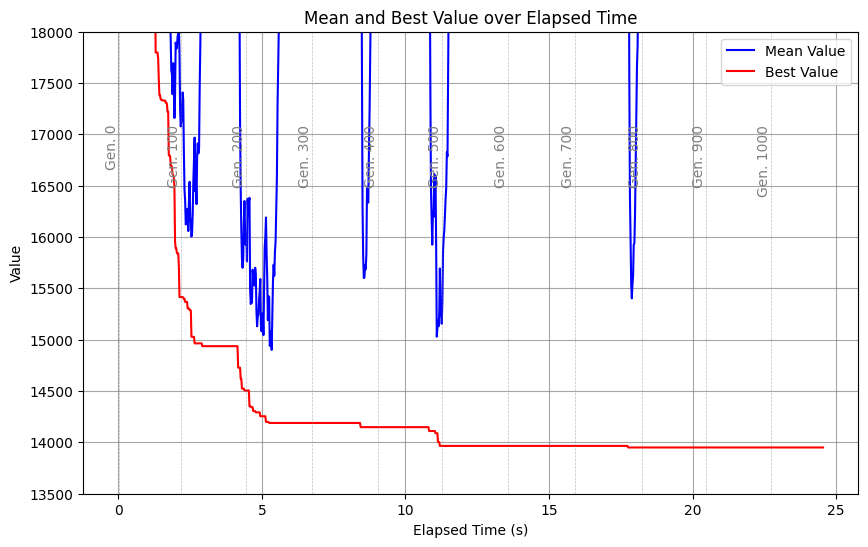

In [31]:
# plot data x axis elapsed time, y axis mean value
# also add a line for each 100. generation and label it with the generation number
y_lim_max = 18_000
y_lim_min = 13_500


plt.figure(figsize=(10, 6))
plt.plot(df["Elapsed time"], df["Mean value"], label="Mean Value", color='blue')
plt.plot(df["Elapsed time"], df["Best value"], label="Best Value", color='red')
for i in range(0, len(df), 100):
    plt.axvline(x=df["Elapsed time"][i], color='gray', linestyle='--',linewidth=0.5, alpha=0.5)
    plt.text(df["Elapsed time"][i], y_lim_max*0.95, "Gen. "+str(df["# Iteration"][i]), rotation=90, verticalalignment='top', horizontalalignment='right', color='gray')
plt.ylim(y_lim_min, y_lim_max)
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Value")
plt.title("Mean and Best Value over Elapsed Time")
plt.legend()
# dark grid
plt.grid(visible=True, which='both', color='gray', alpha=0.7)
plt.show()  